# (Ford Gobike Exploration)
## by (Alaa Mehanna)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [49]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [50]:
df_ford = pd.read_csv('fordgobike_tripdata.csv')

In [51]:
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [52]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> some data types are wrong


> duration is in seconds (needs to be changed into more logical unit)

In [53]:
df_ford.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [54]:
df_ford.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [55]:
df_ford.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [56]:
df_ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> some values are Nan (missing)

## Assessing summary 
> some data types are wrong (start_time,end_time,start_station_id,bike_id,member_birth_year)

> some missing values (Nan)

> new columns will be added ( duration in minute, trip start date in dd-mm-yyyy format, start hour of the day, day of week[DOW] and month of year, age of users)


## Cleaning

In [57]:
# first copying the dataframe
df = df_ford.copy()

In [58]:
# removing missing values
df.dropna(inplace=True)

In [59]:
df.isnull().sum().sum()

0

In [60]:
# changing data types
df.start_station_id = df.start_station_id.astype('str')
df.end_station_id = df.end_station_id.astype('str')
df.bike_id = df.bike_id.astype('str')
df.member_birth_year = df.member_birth_year.astype('int')

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [62]:
# adding new columns
## a new column for duration in min

df['duration_min'] = df.duration_sec /60

In [63]:
## extracting the start date , hour of day, day of week , month of year into new columns from Start_time

df['start_date'] = df.start_time.dt.strftime('%d-%m-%Y')
df['start_month'] = df.start_time.dt.strftime('%B')
df['start_day_of_week'] = df.start_time.dt.strftime('%A')
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')


In [64]:
## adding users age column
df['riders_age'] = 2021 - df.member_birth_year

In [65]:
# changing the dtype of riders_age column 
df.riders_age = df.riders_age.astype('int')

In [66]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_month,start_day_of_week,start_hour_of_day,riders_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,869.750000,28-02-2019,February,Thursday,17,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,1030.900000,28-02-2019,February,Thursday,12,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,608.166667,28-02-2019,February,Thursday,17,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,26.416667,28-02-2019,February,Thursday,23,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,29.883333,28-02-2019,February,Thursday,23,62


In [67]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,riders_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,11.733379,36.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,27.370082,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,20.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.383333,29.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,8.500000,34.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,13.150000,41.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1409.133333,143.000000


> there are some outliers in my data, ex: max age is 143

In [68]:
df.riders_age.value_counts()

33     10214
28      9323
32      8967
31      8640
30      8484
       ...  
94         1
93         1
111        1
91         1
143        1
Name: riders_age, Length: 75, dtype: int64

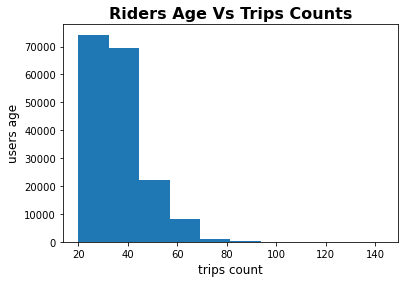

In [69]:
plt.hist(df['riders_age']);
plt.title('Riders age vs trips counts'.title(), fontsize= 16, weight = 'bold');
plt.ylabel('users age', fontsize= 12);
plt.xlabel('trips count', fontsize= 12);

In [70]:
# I will filter out the outliers (ages above 80)

df = df.query('riders_age <= 80')

In [71]:
df.riders_age.value_counts()

33    10214
28     9323
32     8967
31     8640
30     8484
      ...  
78       30
79       21
75       19
80        9
77        2
Name: riders_age, Length: 61, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174749 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174749 non-null  int64         
 1   start_time               174749 non-null  datetime64[ns]
 2   end_time                 174749 non-null  datetime64[ns]
 3   start_station_id         174749 non-null  object        
 4   start_station_name       174749 non-null  object        
 5   start_station_latitude   174749 non-null  float64       
 6   start_station_longitude  174749 non-null  float64       
 7   end_station_id           174749 non-null  object        
 8   end_station_name         174749 non-null  object        
 9   end_station_latitude     174749 non-null  float64       
 10  end_station_longitude    174749 non-null  float64       
 11  bike_id                  174749 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> The dataset now contains 174,749 rides data with 22 variables ('duration_sec', 'start_time', 'end_time', 'start_station_id',
'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name',
'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip','duration_min', 'start_date', 'start_month', 'start_day_of_week','start_hour_of_day', 'riders_age')
These vairables are maninly divided into 3 categories (trip info, station info, user info)



### What is/are the main feature(s) of interest in your dataset?


> I'm interested in exploring trips' duration and whether is dependent on other features such as: start station, end station,user type, gender, age, etc..

> I'm also interested in knowing When are most trips taken and How long does the average trip take.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trips' Start data and duration info will indicate how long on average a trip takes. The user info will help indicate our segments of users and whether there is any special pattern on not.

## Univariate Exploration



In [73]:
def hist_chart(df,col):
    """
    this function is for drawing a histgram chart to reduce repetitive code.
    """
    order1 = df[col].value_counts().sort_index().index
    base_color = sb.color_palette()[0]
    plt.rcParams['figure.figsize'] = 10, 8
    
    
    sb.countplot(data = df, x = col, color = base_color, order = order1);
    plt.xlabel(f'{col}'.title().replace('_',' '), fontsize= 12, weight = 'bold');
    plt.ylabel('Count', fontsize= 12, weight = 'bold');


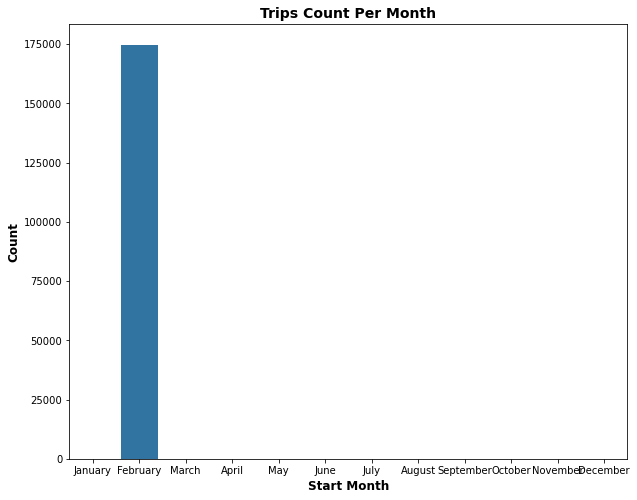

In [74]:
# trip distribution over the year

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(monthcat)

hist_chart(df,'start_month')
plt.title('trips count per month'.title(), fontsize= 14, weight = 'bold');

> My data set contains info of trip rides of February only

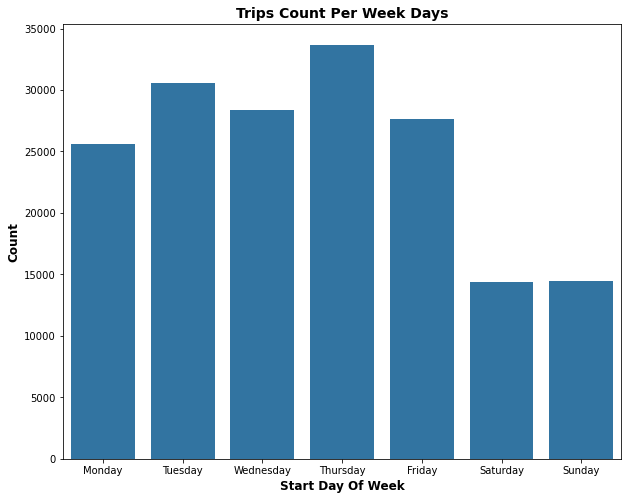

In [75]:
# trip distribution over days of the week

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day_of_week'] = df['start_day_of_week'].astype(weekdaycat)

hist_chart(df,'start_day_of_week')
plt.title('trips count per Week days'.title(), fontsize= 14, weight = 'bold');

> The majority of the usage happened during workdays (Monday - Friday) , and the least rides were on days off

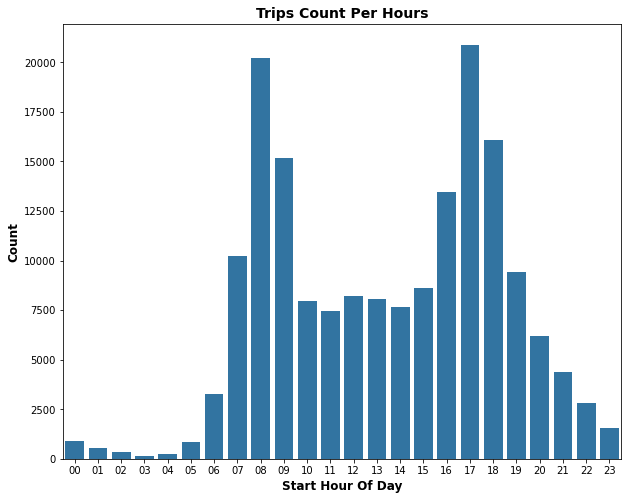

In [76]:
# trip distribution over day hours

hist_chart(df,'start_hour_of_day')
plt.title('trips count per hours'.title(), fontsize= 14, weight = 'bold');

> The peaks of trips are mainly on (7-9 am) and also on (4-6 pm)

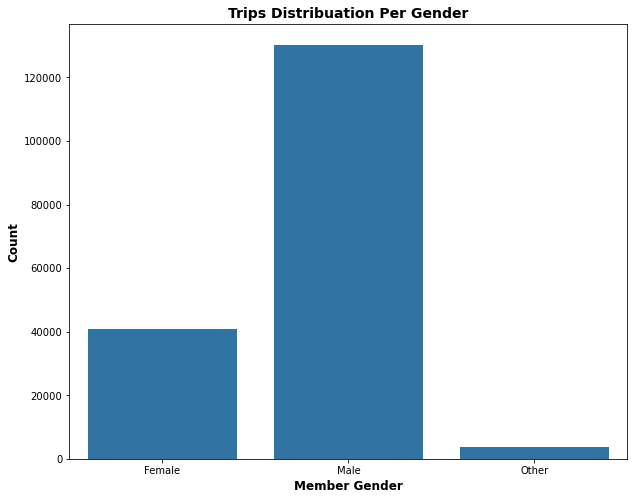

In [77]:
# users comparison regarding their gender

hist_chart(df,'member_gender')
plt.title('trips distribuation per gender'.title(), fontsize= 14, weight = 'bold');

> the majority of the users are Males

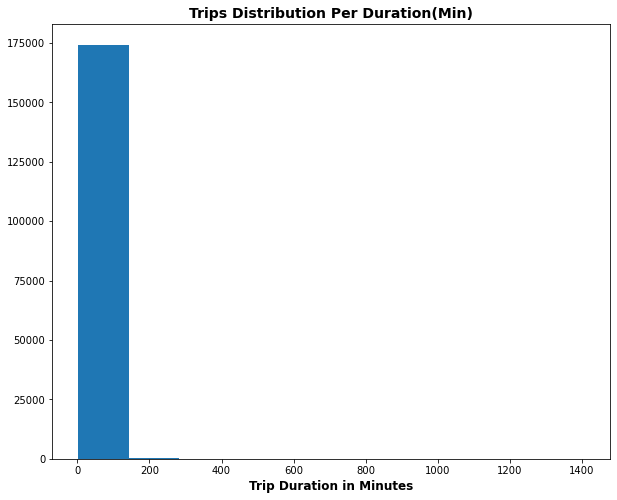

In [78]:
# trip duration count

plt.hist(data=df, x='duration_min');
plt.xlabel('Trip Duration in Minutes', fontsize= 12, weight = 'bold');
plt.title('trips distribution per duration(Min)'.title(), fontsize= 14, weight = 'bold');

> over 99% of trip druration are less than 200 mins

In [79]:
df.duration_min.describe()

count    174749.000000
mean         11.738343
std          27.384592
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

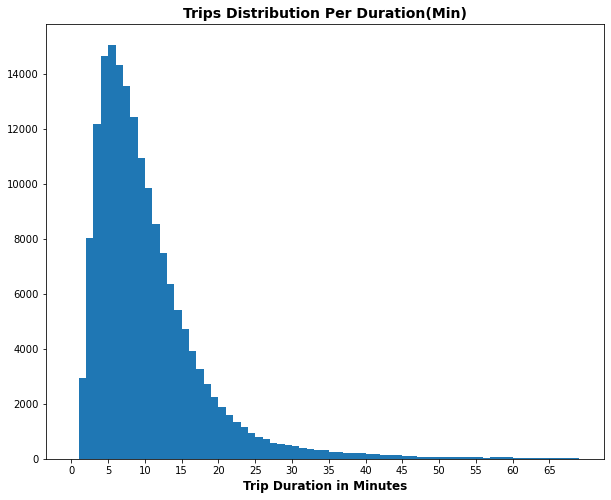

In [80]:
bin = np.arange(0, 70, 1)
ticks = np.arange(0, 70, 5)
plt.hist(data=df, x='duration_min', bins=bin);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minutes', fontsize= 12, weight = 'bold');
plt.title('trips distribution per duration(Min)'.title(), fontsize= 14, weight = 'bold');

> The majority of the rides are less than one hour

In [81]:
# I will filter out outliers where the duration was too long

df = df.query('duration_min <= 65')

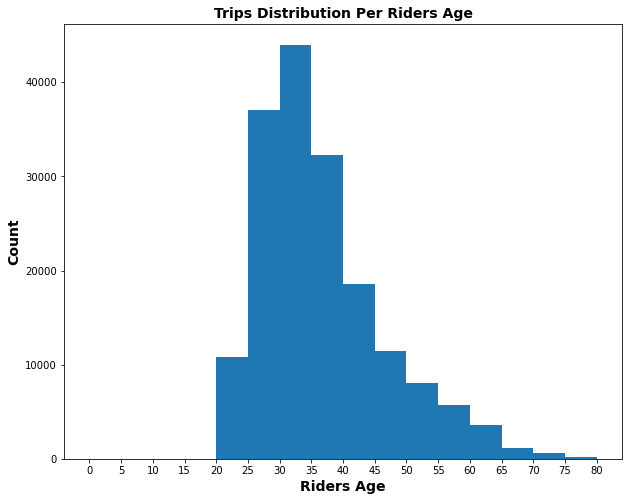

In [82]:
# trip count along with users age

bins = np.arange(0, df['riders_age'].max()+5, 5)
plt.hist(data=df, x='riders_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Riders Age', fontsize= 14, weight = 'bold');
plt.ylabel('Count', fontsize= 14, weight = 'bold');
plt.title('trips distribution per Riders age'.title(), fontsize= 14, weight = 'bold');

> The majority of the users were around 25 to 40 years old.

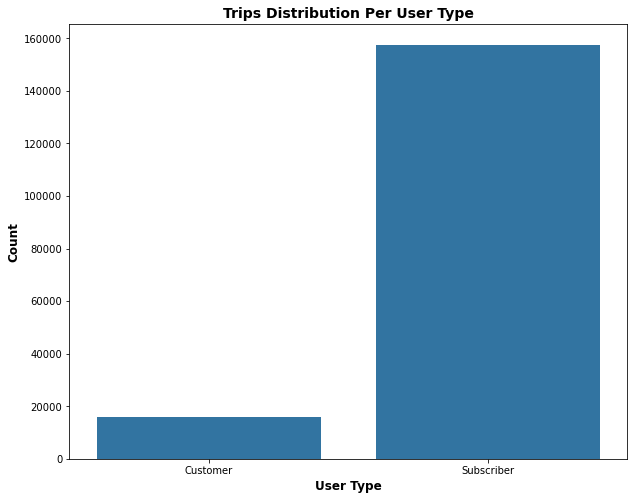

In [83]:
# users comparison regarding their type (customer/subscriber)

hist_chart(df,'user_type')
plt.title('trips distribution per user type'.title(), fontsize= 14, weight = 'bold');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The peaks of number of trips are on (7-9 am) and also on (4-6 pm) during a day, there were more trips on work days (Mon-Fri) compared to weekends

> There were more male riders than female, and most members were subscribers. The majority of the users were around 25 to 40 years old.

> Most rides were short in duration.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The trip duration was a bit awkward or surprising and i had to remove some outliers to focus on the majority of my data.

## Bivariate Exploration



In [84]:
df2 = df.copy()

In [85]:
def box_plot(df,col1,col2):
    """
    this function is for drawing a box plot to reduce repetitive code.
    """
    base_color = sb.color_palette()[0]
    sb.boxplot(data=df, x= col1, y=col2, color=base_color);
    plt.xlabel(f'{col1}'.title().replace('_',' '), fontsize= 12, weight = 'bold');
    plt.ylabel(f'{col2}'.title().replace('_',' '), fontsize= 12, weight = 'bold');

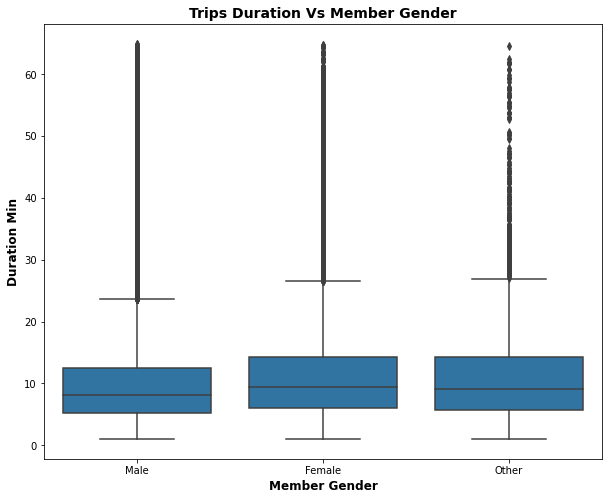

In [86]:
# How does the trip duration distribution vary by gender
box_plot(df2,'member_gender','duration_min')
plt.title('trips duration VS member Gender'.title(), fontsize= 14, weight = 'bold');

> There is no significant difference here but in general males have shorter trips.

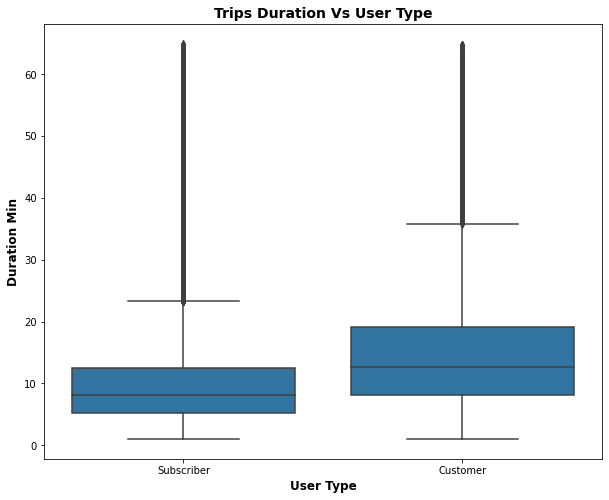

In [87]:
# How does the trip duration distribution vary by user type
box_plot(df2,'user_type','duration_min')
plt.title('trips duration VS user type'.title(), fontsize= 14, weight = 'bold');

> In general the subscriber user has shorter trips than a casual customer which might indicate a specific subscribing deal which motivate such attitude 

In [88]:
def bar_chart(df,col1,col2):
    """
    this function is for drawing a bar chart to reduce repetitive code.
    """
    
    
    base_color = sb.color_palette()[0]
    sb.barplot(data=df2, x=col1, y=col2, color=base_color);
    plt.xlabel(f'{col1}'.title().replace('_',' '), fontsize= 12, weight = 'bold');
    plt.ylabel(f'{col2}'.title().replace('_',' '), fontsize= 12, weight = 'bold');

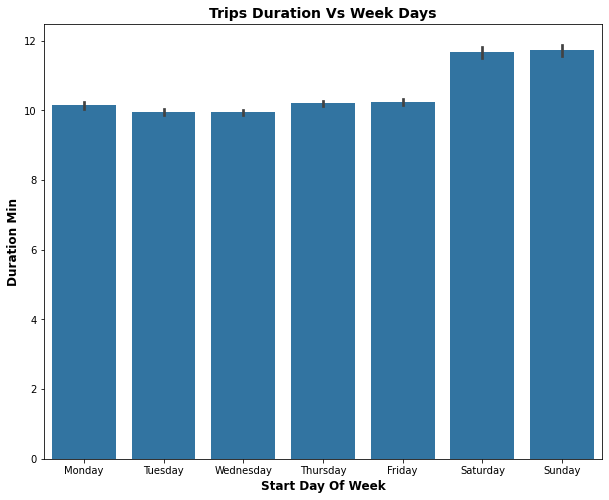

In [89]:
# average trip durations during weekdays 

bar_chart(df2,'start_day_of_week','duration_min')
plt.title('trips duration VS Week days'.title(), fontsize= 14, weight = 'bold');

> The average trip duration is shorter on workdays (Mon-Fri) than days off.

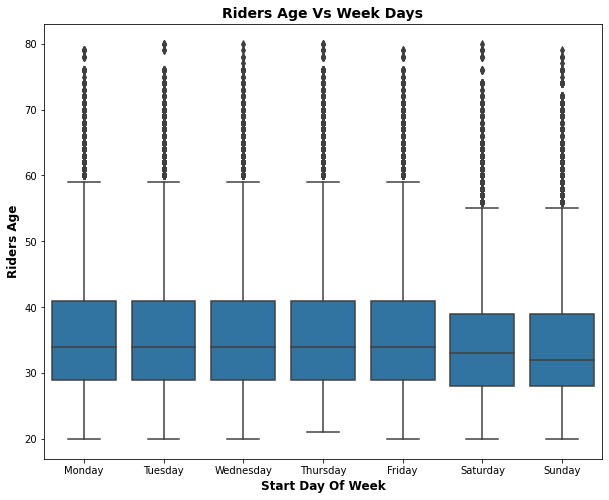

In [90]:
# Member age by weekdays
box_plot(df2,'start_day_of_week','riders_age')
plt.title('Riders Age VS Week days'.title(), fontsize= 14, weight = 'bold');

> The users on workday are a bit older than the users on weekends

In [91]:
def bi_hist(df,col1,col2):
    """
    this function is for drawing a hist chart for bivariate analysis to reduce repetitive code.
    """
    sb.countplot(data=df2, x=col1, hue=col2);
    plt.xlabel(f'{col1}'.title().replace('_',' '), fontsize= 12, weight = 'bold');
    plt.ylabel('Count', fontsize= 12, weight = 'bold');
    

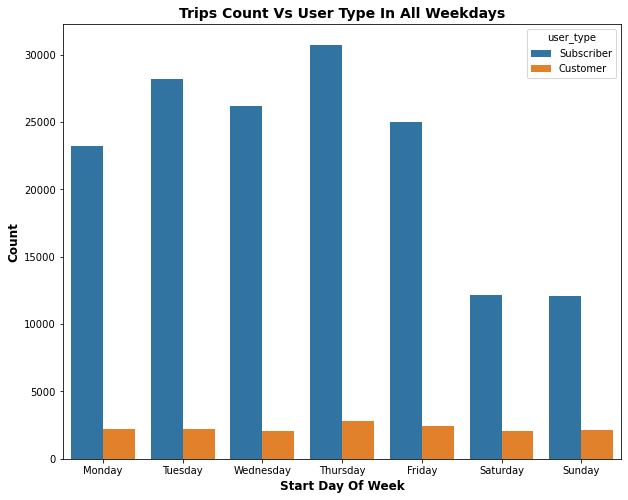

In [92]:
# weekly usage of different usage types

bi_hist(df2,'start_day_of_week','user_type')
plt.title('Trips Count VS User Type in all weekdays'.title(), fontsize= 14, weight = 'bold');

> overall the number of subscriber are much more than normal customers.

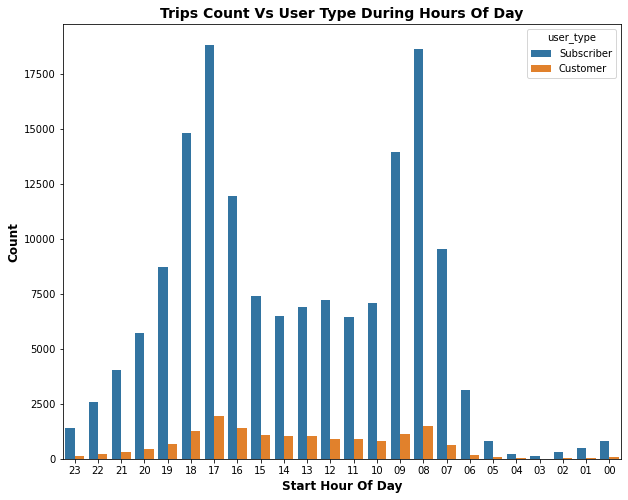

In [94]:
# daily usage of different user type 

bi_hist(df2,'start_hour_of_day','user_type')
plt.title('Trips count VS User type during hours of day'.title(), fontsize= 14, weight = 'bold');

> subscriber are the ones pushing the trips numbers during rush hours which might indicate using it on a regular basis for work or other frequent usage purposes

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> in general Males users have shorter trip durations as well as subscribers, also average trip duration is shorter on work days than weekends. if you compare the age of users on work days you'll find them slightly older than on weekends

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting that the users in work days (Mon-Fri) are older and take shorter rides on average.

## Multivariate Exploration



In [95]:
df3 = df2.copy()

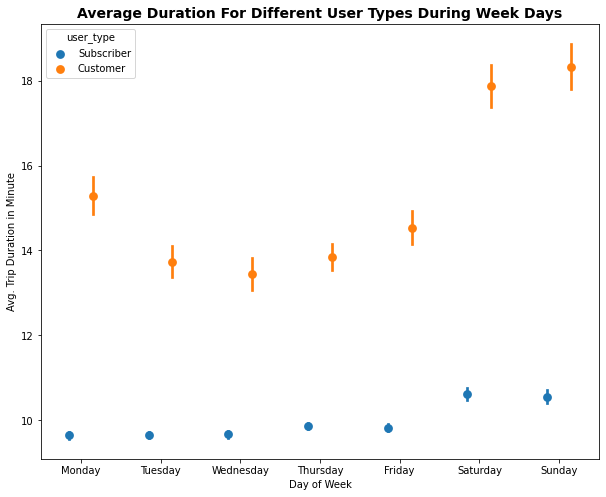

In [97]:
# How does the average trip duration vary in weekdays between customers and subscribers?


sb.pointplot(data=df3, x='start_day_of_week', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Average duration for different user types during week days'.title(), fontsize= 14, weight = 'bold');

> subscribers tend to have much shorter trip durations and they both have slight increase in duration on weekends 

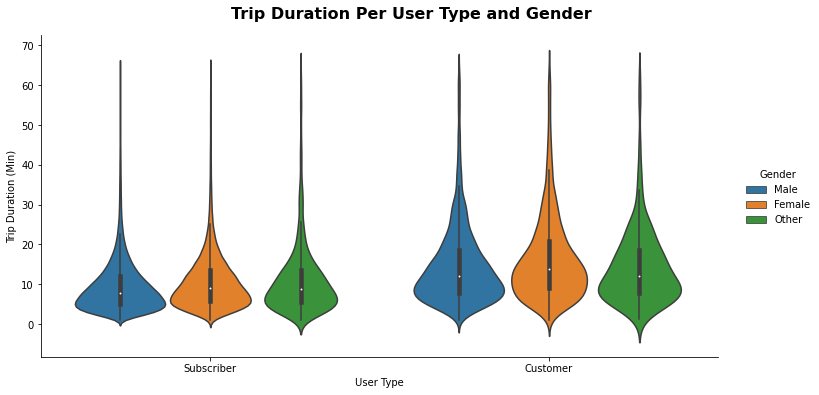

In [98]:
# duration (min) per user type and gender

graph = sb.catplot(data=df3, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Trip Duration Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

> In general females take longer on rides than males/others both as subsciber and customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


>The multivariate exploration amplified some of the previous data topics and patterns discovered in the previous bivariate exploration as well as univariate exploration, we saw that subscribers tend to have much shorter trip durations and they both (subscriber and customers) have slight increase in duration on weekends. we also came across the fact that females take longer on rides than males/others both as subsciber and customers.


### Were there any interesting or surprising interactions between features?


>It would be more powerful to investigate different users behaviours and how they use the system differently and then divide them into segments and take this analysis further through more in depth analysis but for now there's no big surprise observed and most of the visualizations were completing each other.

In [99]:
df3.to_csv('fordgobike_df3.csv', index=False)